In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/voicegender/voice.csv


Loading the dataset

In [2]:
df=pd.read_csv("../input/voicegender/voice.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


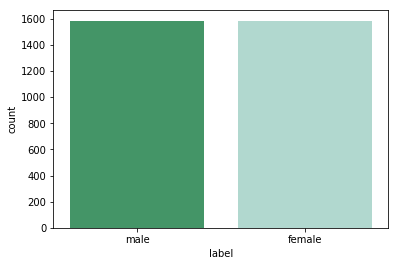

female    1584
male      1584
Name: label, dtype: int64

In [5]:
sns.countplot(df.label,palette="BuGn_r")
plt.show()
df.label.value_counts()

Label Encoding

In [6]:
df.label = [1 if i == "male" else 0 for i in df.label]

In [7]:
df.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [8]:
X=df.drop(["label"],axis=1)
y=df.label.values

Normalization

In [9]:
x=(X-np.min(X))/(np.max(X)-np.min(X))

Splitting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("X train shape : ",X_train.shape)
print("Y train shape : ",Y_train.shape)
print("X test shape : ",X_test.shape)
print("Y test shape : ",Y_test.shape)

X train shape :  (2534, 20)
Y train shape :  (2534,)
X test shape :  (634, 20)
Y test shape :  (634,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

Using TensorFlow backend.


Building the Model

In [12]:
classifier= Sequential() # start the model
classifier.add(Dense(output_dim=80,init="uniform",activation="relu",input_dim=20))
classifier.add(Dropout(p=0.2))
classifier.add(Dense(output_dim=100,init="uniform",activation="tanh"))
classifier.add(Dropout(p=0.2))
classifier.add(Dense(output_dim=120,init="uniform",activation="relu"))
classifier.add(Dropout(p=0.2))
classifier.add(Dense(output_dim=200,init="uniform",activation="relu"))
classifier.add(Dropout(p=0.2))
classifier.add(Dense(output_dim=1,init="uniform",activation="sigmoid"))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=80, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=100, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="uniform")

In [13]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Fit the model

In [41]:
history =classifier.fit(X_train.values,Y_train,batch_size=250,nb_epoch=250)


Epoch 1/250
2534/2534 [==============================] - 0s 24us/step - loss: 0.0198 - accuracy: 0.9917
Epoch 2/250
2534/2534 [==============================] - 0s 23us/step - loss: 0.0170 - accuracy: 0.9925
Epoch 3/250
2534/2534 [==============================] - 0s 22us/step - loss: 0.0179 - accuracy: 0.9941
Epoch 4/250
 250/2534 [=>............................] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


2534/2534 [==============================] - 0s 23us/step - loss: 0.0220 - accuracy: 0.9941
Epoch 5/250
2534/2534 [==============================] - 0s 22us/step - loss: 0.0217 - accuracy: 0.9913
Epoch 6/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0323 - accuracy: 0.9897
Epoch 7/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0369 - accuracy: 0.9874
Epoch 8/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0296 - accuracy: 0.9866
Epoch 9/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0312 - accuracy: 0.9850
Epoch 10/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0290 - accuracy: 0.9882
Epoch 11/250
2534/2534 [==============================] - 0s 21us/step - loss: 0.0291 - accuracy: 0.9897
Epoch 12/250
2534/2534 [==============================] - 0s 32us/step - loss: 0.0226 - accuracy: 0.9909
Epoch 13/250
2534/2534 [==============================] - 0s 28us/step - 

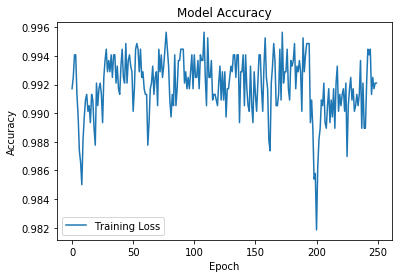

In [42]:


# Visualize loss history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [43]:
y_prediction=classifier.predict(X_test)

In [44]:
y_prediction= [1 if i>=0.5 else 0 for i in y_prediction]

In [45]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test,y_prediction)

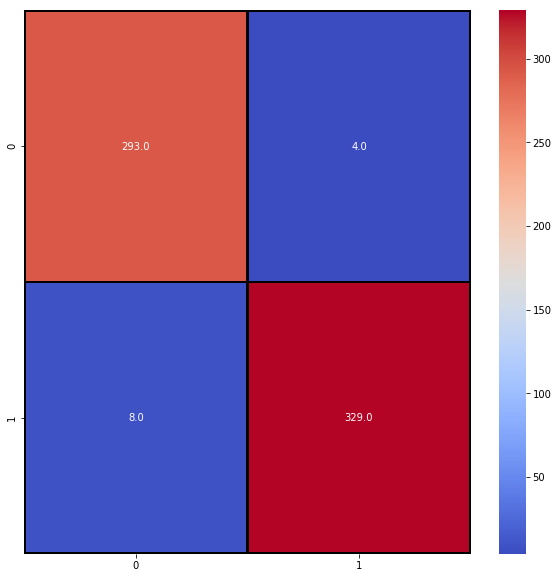

In [46]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=2,linecolor="black",fmt=".1f",ax=ax)
plt.show()